### IMDB Dataset of top 500 movies and tv shows

#### Importing all required libraries

In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time

In [11]:
imdb = pd.read_csv("imdb.csv")

In [12]:
imdb

,Title,Released_Year,certificate,RunTime,Genre,Ratings,Overview,MetaScore,Director,Star1,Star2,Star3,Star4,Votes,Gross(M)
0,Citizen Kane,1941,UA,119,"Drama, Mystery",8.3,Following the death of publishing tycoon Charl...,100,Orson Welles,Orson Welles,Joseph Cotten,Dorothy Comingore,Agnes Moorehead,458535,1.59
1,The Godfather,1972,A,175,"Crime, Drama",9.2,"Don Vito Corleone, head of a mafia family, dec...",100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1964,134.97
2,The Wizard of Oz,1939,U,102,"Adventure, Family, Fantasy",8.1,Young Dorothy Gale and her dog Toto are swept ...,92,"Victor Fleming,",Judy Garland,Frank Morgan,Ray Bolger,Bert Lahr,419203,2.08
3,The Shawshank Redemption,1994,A,142,Drama,9.3,"Over the course of several years, two convicts...",82,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2819,28.34
4,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",95,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,2161,107.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,From Here to Eternity,1953,UA,118,"Drama, Romance, War",7.6,"At a U.S. Army base in 1941 Hawaii, a private ...",85,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,49929,30.50
513,Walk the Line,2005,U,136,"Biography, Drama, Music",7.8,A chronicle of country music legend Johnny Cas...,72,James Mangold,Joaquin Phoenix,Reese Witherspoon,Ginnifer Goodwin,Robert Patrick,261587,119.52
514,The Last Emperor,1987,U,163,"Biography, Drama, History",7.7,Bernardo Bertolucci's Oscar-winning dramatisat...,76,Bernardo Bertolucci,John Lone,Joan Chen,Peter O'Toole,Ruocheng Ying,109219,43.98
515,Mutiny on the Bounty,1935,U,132,"Adventure, Biography, Drama",7.6,First mate Fletcher Christian leads a revolt a...,87,Frank Lloyd,Charles Laughton,Clark Gable,Franchot Tone,Herbert Mundin,24381,87.65


#### Number of Null values

In [72]:
imdb.isnull().sum() # check for null values , there should not be any null values

Title            0
Released_Year    0
certificate      0
RunTime          0
Genre            0
Ratings          0
Overview         0
MetaScore        0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
Votes            0
Gross(M)         0
dtype: int64

### Type of Data

In [73]:
imdb.dtypes # type of data 

Title             object
Released_Year      int64
certificate       object
RunTime            int64
Genre             object
Ratings          float64
Overview          object
MetaScore          int64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
Votes              int64
Gross(M)         float64
dtype: object

## Shape of the Database

In [20]:
print("The shape of the dataset is: {} rows and {} columns".format(imdb.shape[0], imdb.shape[1]))

The shape of the dataset is: 517 rows and 15 columns


## Quick View of Data

In [74]:
imdb.head()

,Title,Released_Year,certificate,RunTime,Genre,Ratings,Overview,MetaScore,Director,Star1,Star2,Star3,Star4,Votes,Gross(M)
0,Citizen Kane,1941,UA,119,"Drama, Mystery",8.3,Following the death of publishing tycoon Charl...,100,Orson Welles,Orson Welles,Joseph Cotten,Dorothy Comingore,Agnes Moorehead,458535,1.59
1,The Godfather,1972,A,175,"Crime, Drama",9.2,"Don Vito Corleone, head of a mafia family, dec...",100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1964,134.97
2,The Wizard of Oz,1939,U,102,"Adventure, Family, Fantasy",8.1,Young Dorothy Gale and her dog Toto are swept ...,92,"Victor Fleming,",Judy Garland,Frank Morgan,Ray Bolger,Bert Lahr,419203,2.08
3,The Shawshank Redemption,1994,A,142,Drama,9.3,"Over the course of several years, two convicts...",82,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2819,28.34
4,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",95,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,2161,107.93


In [75]:
imdb.tail()

,Title,Released_Year,certificate,RunTime,Genre,Ratings,Overview,MetaScore,Director,Star1,Star2,Star3,Star4,Votes,Gross(M)
512,From Here to Eternity,1953,UA,118,"Drama, Romance, War",7.6,"At a U.S. Army base in 1941 Hawaii, a private ...",85,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,49929,30.50
513,Walk the Line,2005,U,136,"Biography, Drama, Music",7.8,A chronicle of country music legend Johnny Cas...,72,James Mangold,Joaquin Phoenix,Reese Witherspoon,Ginnifer Goodwin,Robert Patrick,261587,119.52
514,The Last Emperor,1987,U,163,"Biography, Drama, History",7.7,Bernardo Bertolucci's Oscar-winning dramatisat...,76,Bernardo Bertolucci,John Lone,Joan Chen,Peter O'Toole,Ruocheng Ying,109219,43.98
515,Mutiny on the Bounty,1935,U,132,"Adventure, Biography, Drama",7.6,First mate Fletcher Christian leads a revolt a...,87,Frank Lloyd,Charles Laughton,Clark Gable,Franchot Tone,Herbert Mundin,24381,87.65
516,The Longest Day,1962,U,178,"Action, Drama, History",7.7,"The events of D-Day, told on a grand scale fro...",75,"Ken Annakin,",John Wayne,Robert Ryan,Richard Burton,Henry Fonda,58278,39.10


### Finding correlation

In [76]:
imdb.corr()

,Released_Year,RunTime,Ratings,MetaScore,Votes,Gross(M)
Released_Year,1.000000,0.145043,0.040116,-0.315399,0.382006,0.254868
RunTime,0.145043,1.000000,0.258793,-0.057270,-0.023991,0.118852
Ratings,0.040116,0.258793,1.000000,-0.041260,0.047909,0.096940
MetaScore,-0.315399,-0.057270,-0.041260,1.000000,-0.075901,-0.081244
Votes,0.382006,-0.023991,0.047909,-0.075901,1.000000,0.123955
Gross(M),0.254868,0.118852,0.096940,-0.081244,0.123955,1.000000


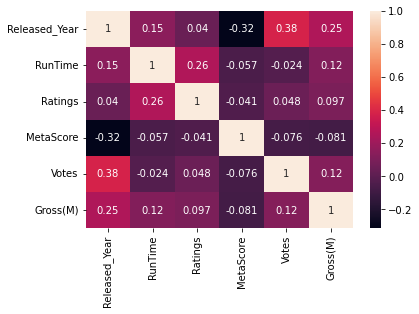

In [107]:
sns.heatmap(imdb[["Released_Year","RunTime","Ratings","MetaScore","Votes","Gross(M)"]].corr(), annot=True)
plt.show()

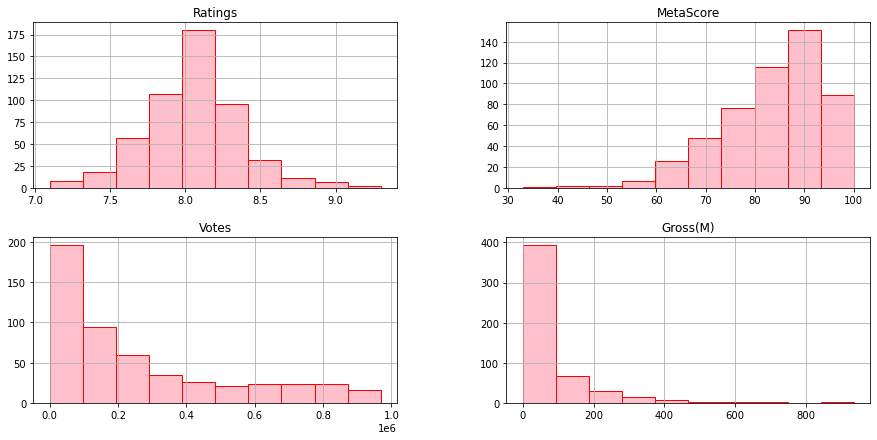

In [77]:
numerical_attributes = ['Ratings', 'MetaScore', 'Votes', 'Gross(M)']
imdb[numerical_attributes].hist(figsize = (15, 7), color = 'pink', edgecolor = "red", layout = (2, 2));

### Insights

1 . The above graph shows the values of Ratings ,  MetaScore , Votes , Gross(M) 

In [78]:
imdb.describe(include = ['O'])

,Title,certificate,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,517,517,517,517,517,517,517,517,517
unique,513,15,164,517,302,368,460,476,492
top,Toy Story,U,Drama,Following the death of publishing tycoon Charl...,Steven Spielberg,Robert De Niro,Joseph Cotten,Carrie Fisher,Michael Caine
freq,3,155,43,1,11,7,3,4,3


### Insights

1 . decribe(include = ["O"] ) shows the categorical column


In [79]:
imdb.describe()

,Released_Year,RunTime,Ratings,MetaScore,Votes,Gross(M)
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,1982.286267,122.622824,8.038491,83.558994,262700.473888,75.540542
std,25.593711,29.022828,0.316363,10.544980,264576.126395,106.819101
min,1916.000000,45.000000,7.100000,33.000000,1018.000000,0.010000
25%,1962.000000,102.000000,7.800000,77.000000,57527.000000,7.100000
50%,1987.000000,118.000000,8.000000,86.000000,166265.000000,44.020000
75%,2004.000000,138.000000,8.200000,91.000000,419429.000000,87.650000
max,2018.000000,238.000000,9.300000,100.000000,968413.000000,936.660000


### Insights

1. describe() shows all the statistical data 

## Top voted movies

In [80]:
top_voted = imdb.sort_values(['Votes'], ascending = False)

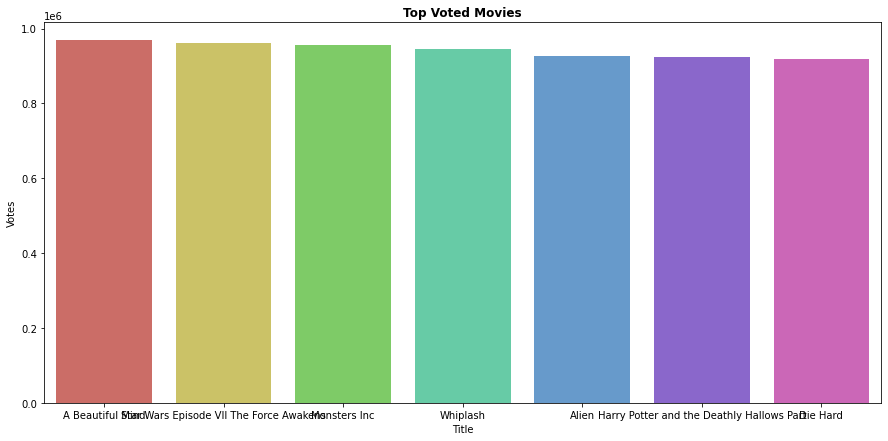

In [81]:
fig,axs=plt.subplots(figsize=(15,7))
g=sns.barplot(x=top_voted['Title'][:7],y=top_voted['Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

### Insights 

1. the above bargraph shows the top 7  most voted movies.
2. A Beautiful Mind is the most voted movie. 

## Top Rated movies

In [45]:
top_voted = imdb.sort_values(['Ratings'], ascending = False)

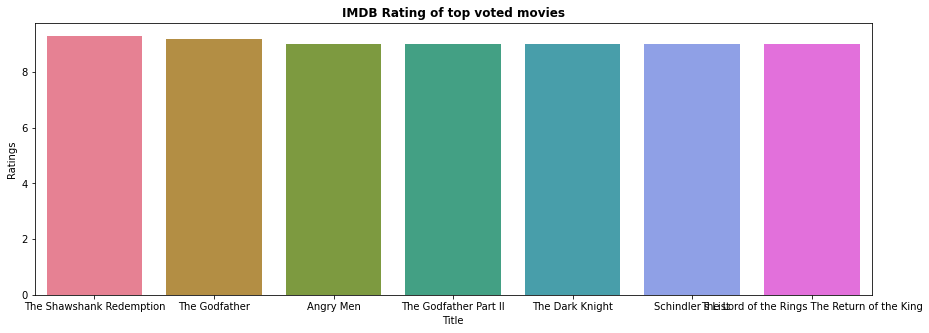

In [46]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Title'][:7],y=top_voted['Ratings'][:7], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
plt.show()

### Insights
1 . the above bargraph shows the top 7 most Rated movies.

2 . The Shawshank Redemption is the most voted movie.

## Gross of top rated movies

In [48]:
top_voted = imdb.sort_values(['Ratings'], ascending = False)

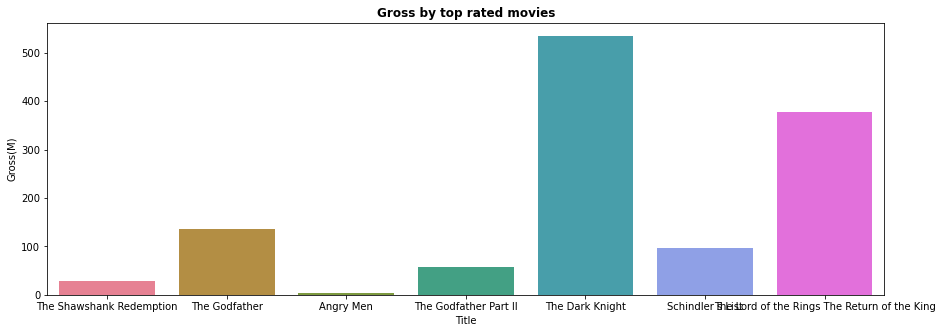

In [50]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Title'][:7],y=top_voted['Gross(M)'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

### Insights
1 . the above bargraph shows the top 7 most  Gross Rated movies.

2 . The Dark Knight is the most Gross Rated  movie.

## Top movies by Gross


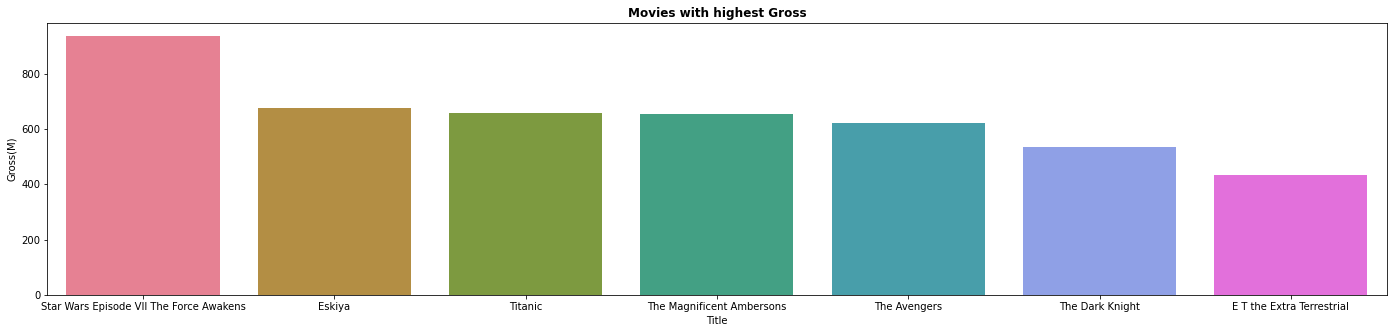

In [14]:
highest_earning = imdb.sort_values(['Gross(M)'], ascending = False)
fig,axs=plt.subplots(figsize=(24,5))
g=sns.barplot(x=highest_earning['Title'][:7],y=highest_earning['Gross(M)'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

### Insights
1 . the above bargraph shows the top 7 most Gross movies.

2 . Star wars VII The Force Awakens is the most Gross movie.

##  Maximum movies released in - 

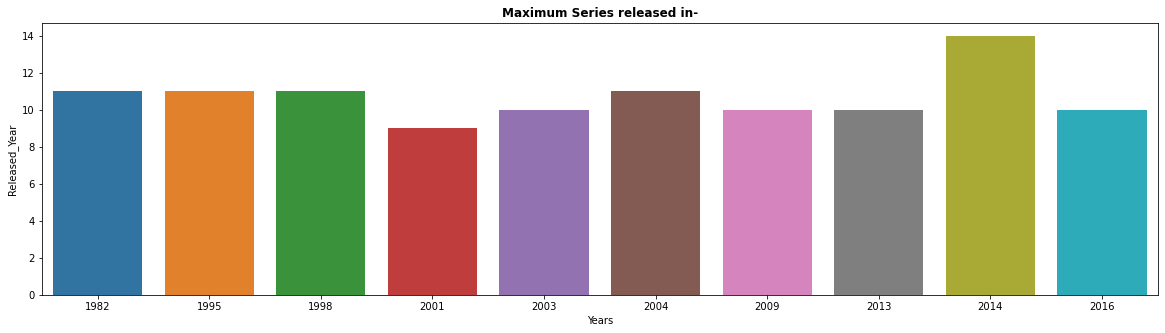

In [54]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=imdb['Released_Year'].value_counts()[:10].index,y=imdb['Released_Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

### Insights
1 . the above bargraph shows the most Maximum movies released.

2 . In 2014 most of the movies are released

###  Directors with most movies (lineplot)

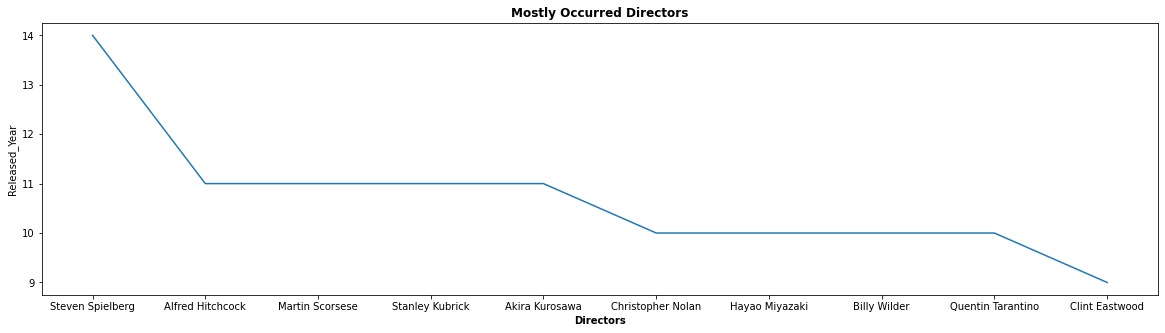

In [55]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.lineplot(x=imdb['Director'].value_counts()[:10].index,y=imdb['Released_Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

##  Directors with most movies(barplot)

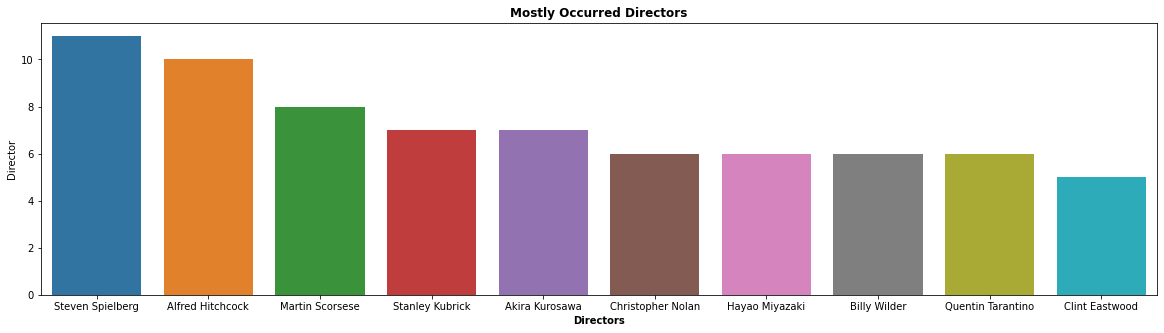

In [56]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=imdb['Director'].value_counts()[:10].index,y=imdb['Director'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

### Insights
1 . the above bargraph shows the Directors on x-axis and number of movies on Y-axis .

2 . Steven spielberg directed more movies compared to others

### Runtime of movies

Text(0.5, 1.0, 'Time Duration of movies')

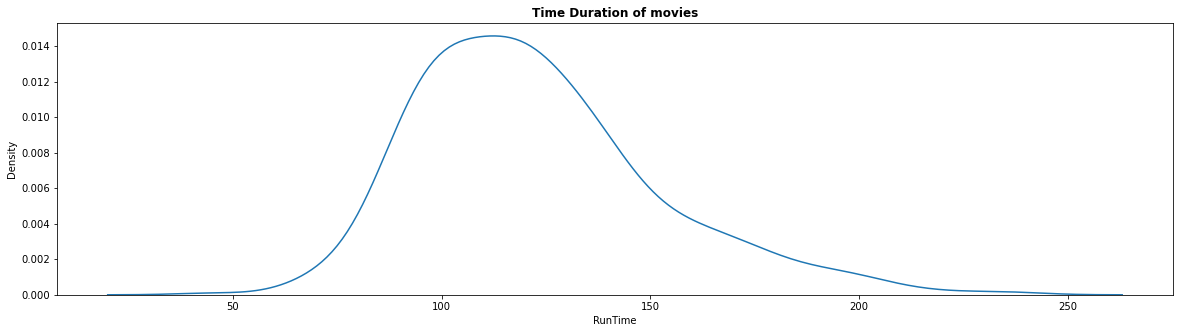

In [66]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.kdeplot(imdb['RunTime'])
g.set_title("Time Duration of movies", weight = "bold")

### Insights

1 . the above kdeplot shows the RunTime of Movies. 


###  Director Names

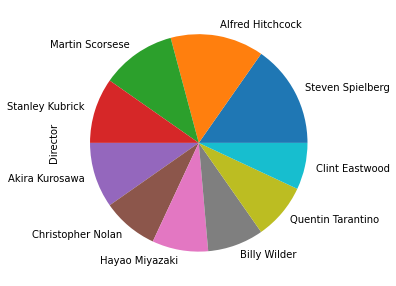

In [86]:
fig,axs=plt.subplots(figsize=(20,5))
imdb["Director"].value_counts()[:10].plot.pie()
plt.show()

## Number of certified movies 

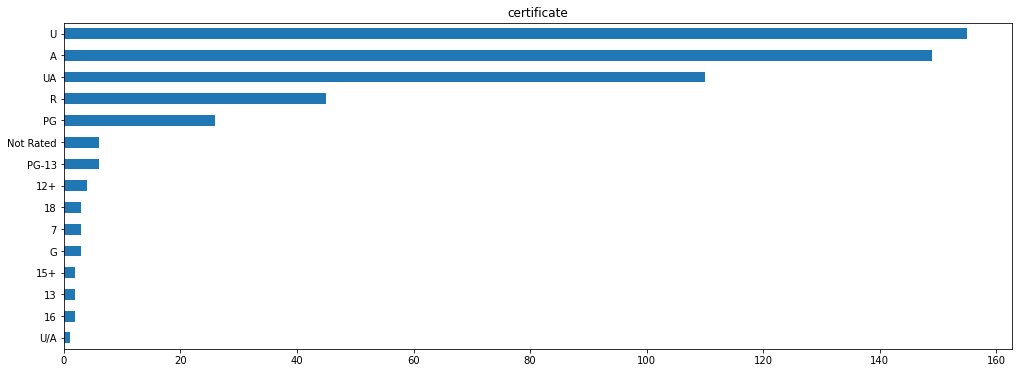

In [104]:
fig,axs=plt.subplots(figsize=(17,6))
imdb['certificate'].value_counts(ascending = True).plot(kind='barh')
plt.title("certificate")
plt.show()

### Insights 

1 . The above horizontal bargraph shows the most number of certified movies

### IMDB Rating Distribution

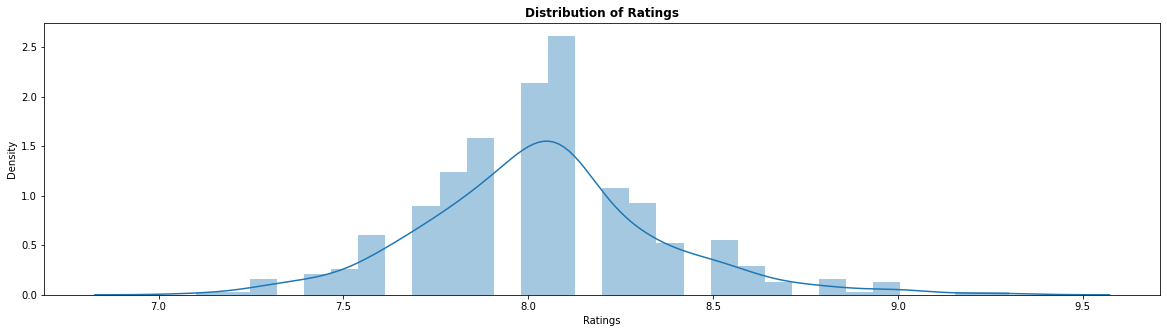

In [121]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(imdb['Ratings'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

## Insights

1 . The above graph shows the top 500 most Rating Distribution


### Appearence of stars in top metaScore

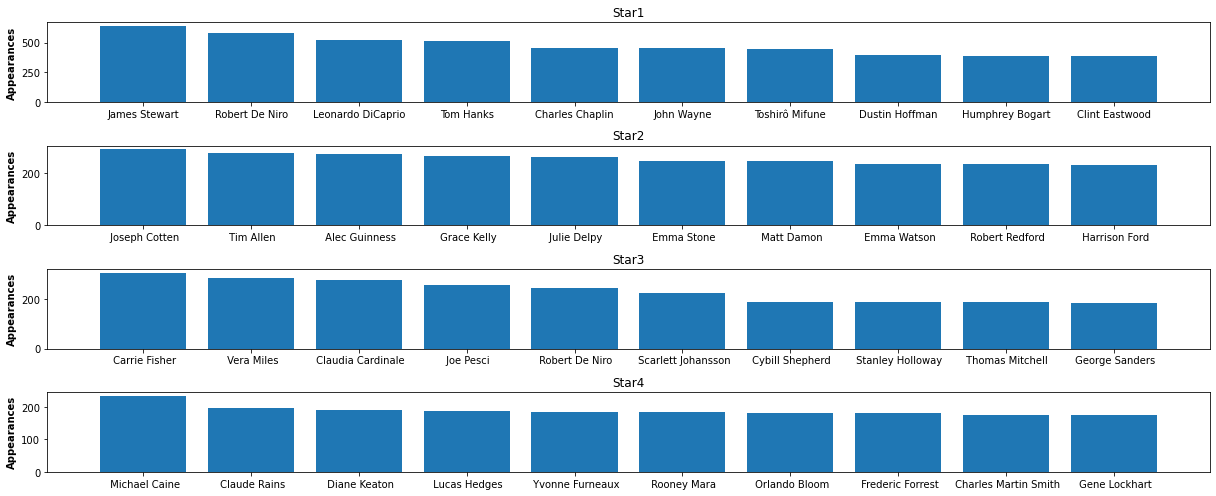

In [13]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(17,7))
ax=0
for x in stars:
    s=imdb.groupby([x]).sum().reset_index()
    d=s.sort_values(['MetaScore']     ,ascending=False)[:10]
    axs[ax].bar(d[x],d['MetaScore'])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

## Insights
1 . the above bargraph shows the top 10 stars with most most Score.

